# Projeto 2 - Análise de dados

**Nome:** *Maria Eduarda Gonçalves Torres*

**Nome:** *Pedro Rubens*

$\Rightarrow$ Carregando algumas bibliotecas :

In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import seaborn as sns
from numpy import nan
from numpy import isnan
import sys 

$\Rightarrow$ Importando database :

In [42]:
data='data.csv'
dados = pd.read_csv(data)
dados.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


$\Rightarrow$ *Vamos usar "df.drop() " para remover a última coluna que esta em branco, como não temos o nome da coluna vamos usar esse "df.drop(df.columns[[  ]], axis=1)" especifico, onde conseguimos apagar a coluna pelo número de sua posição.*

In [43]:
dados = dados.drop(dados.columns[[32]], axis=1) 

#coluna id é inutil para nos 
dados = dados.drop(columns=['id'])


In [44]:
dados

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


$\Rightarrow$ *Vamos usar o dados.shape( ) para descobrir o número de linhas e o número de colunas*

In [45]:
dados.shape

(569, 31)

$\Rightarrow$ *O código abaixo vai conferir se não temos mais nenhum "nan" e se nosso dataframe está todo em "float"*

In [46]:
dados.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [47]:
dados.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
correlacao = dados.corr()
correlacao

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [49]:
dados['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [50]:
dados['diagnosis'] = dados['diagnosis'].map({'B': 1, 'M': 0})

dados

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [51]:

n = len(dados.columns)-1

X = np.array(dados.drop('diagnosis',1))
Y = dados.iloc[:,:1].values


In [52]:
mean = X.mean(axis=0)
std = X.std(axis=0)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)


In [54]:
#binary cross entropy

In [55]:
#funçao que faz com que o x0 seja sempre 1
def coloca_uns(X):
    uns = np.ones([X.shape[0],1])
    return np.concatenate((uns,X),axis=1)
    
#funçao sigmod
def sigmoid(x):
    return 1/(1+np.exp(-x))
#
def binary_cross_entropy(w,X,Y):
    amostras = len(X)

    funçao = np.sum(np.multiply(-Y,np.log(sigmoid(X @ w.T)))-(np.multiply((1-Y),np.log(1 - sigmoid(X @ w.T)))))

    return funçao/amostras

#gradiente descendente
def gradient_descent(w,X,y,alpha,epoch):
    cost = np.zeros(epoch)
    for i in range(epoch):
        w = w - (alpha/len(X)) * np.sum((sigmoid(X @ w.T) - Y)*X, axis=0)
        cost[i] = binary_cross_entropy(w, X, Y)
    
    return w,cost





In [56]:
w = np.random.rand(1,n)
w

array([[0.22210329, 0.82925716, 0.44724267, 0.09680568, 0.74202704,
        0.64409493, 0.5018486 , 0.52898691, 0.31936963, 0.61978963,
        0.00641739, 0.37852585, 0.37532784, 0.24234825, 0.47638832,
        0.7625159 , 0.72820442, 0.57247393, 0.75721548, 0.0162767 ,
        0.86633913, 0.50873101, 0.49750728, 0.04358837, 0.309226  ,
        0.83985497, 0.61530388, 0.23561511, 0.68907332, 0.35378676]])

In [57]:
alpha=0.01 # taxa de aprendizado
epoch = 600

In [58]:
w, cost = gradient_descent(w, X, Y, alpha, epoch)


Text(0.5, 1.0, 'Erro vs. Epoch(iteraçoes)')

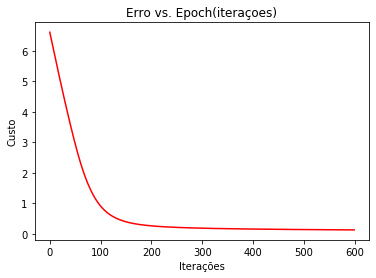

In [59]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch(iteraçoes)')

In [60]:
w

array([[-0.41345463,  0.05722502, -0.22165595, -0.53872006,  0.12947937,
        -0.18235128, -0.3979453 , -0.37412844, -0.28567103,  0.30837431,
        -0.65179915,  0.06024127, -0.2805647 , -0.33799791,  0.17532198,
         0.19305385,  0.27295611, -0.03653371,  0.38092286, -0.28163551,
         0.13887937, -0.31505107, -0.25417935, -0.65347205, -0.40123149,
         0.01851128, -0.25133549, -0.67973755, -0.04945988, -0.25569614]])

In [68]:
def predict(w, X, threshold=0.5):
    p = sigmoid(X @ w.T) >= threshold
    return (p.astype('int'))

In [61]:
dados.iloc[0,2]

10.38

In [29]:
for i in range(29):
    valores = []
    dados.iloc[0,i+1].append(valores)
valores

AttributeError: 'numpy.float64' object has no attribute 'append'

In [559]:
values = dados.np.linspace(0,30,569)
values

AttributeError: 'DataFrame' object has no attribute 'np'

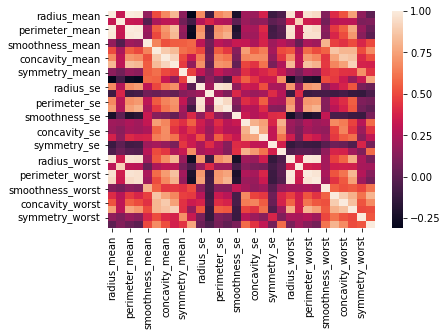

In [586]:
sns.heatmap(correlacao)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274275CFDA0>,
      dtype=object)

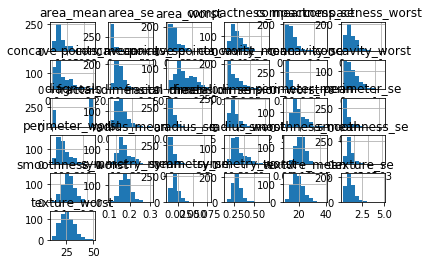

In [587]:
dados.hist()

Text(0, 0.5, 'radius_mean')

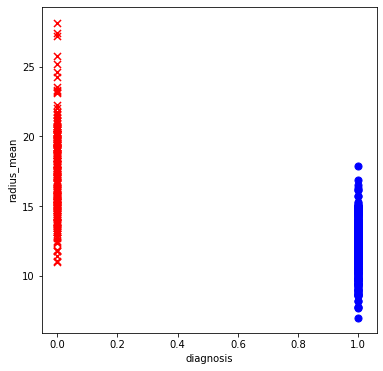

In [592]:
belignos = dados[dados['diagnosis'].isin([1])]  
malignos = dados[dados['diagnosis'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 

ax.scatter(belignos['diagnosis'], belignos['radius_mean'], s=50, c='b', marker='o', label='beligno')  
ax.scatter(malignos['diagnosis'], malignos['radius_mean'], s=50, c='r', marker='x', label='maligno')  

ax.set_xlabel('diagnosis')  
ax.set_ylabel('radius_mean')



Text(0, 0.5, 'fractal_dimension_worst')

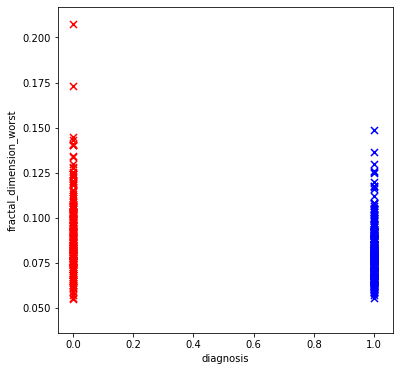

In [595]:
fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(belignos['diagnosis'], belignos['fractal_dimension_worst'], s=50, c='b', marker='x', label='beligno')  
ax.scatter(malignos['diagnosis'], malignos['fractal_dimension_worst'], s=50, c='r', marker='x', label='maligno')  
ax.set_xlabel('diagnosis')
ax.set_ylabel('fractal_dimension_worst')

In [32]:
fig, axs = plt.subplots(30)



SyntaxError: EOL while scanning string literal (<ipython-input-32-9587edafe789>, line 2)

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

ValueError: all the input arrays must have same number of dimensions

In [80]:

sigmoid(X[19]@ w.T)

array([0.72983741])

In [75]:
#melhorar a base de dados, para aumentar a porcetagem de acertos 
diagnostico = 0 
acerto = 0
for i in range(0,569):
    if sigmoid(X[i]@ w.T) > 0.5:
       diagnostico = 1
    if predict(w,X[i]):
        acerto+=1
acerto/569




0.616871704745167

In [93]:
varquanti=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']



for var in varquanti:
    faixa = 2

    plt.figure(figsize=(15,6))

    plt.subplot(121)

    plt.hist(dados[dados.diagnosis==0][var], bins=faixa, density=True)
    plt.xlabel(f'{​​var}​​')


    plt.subplot(122)

    plt.hist(dados[dados.diagnosis==1][var], bins=faixa, density=True)
    plt.xlabel(f'{​​var}​​')




SyntaxError: invalid character in identifier (<fstring>, line 1)

In [81]:
print(dados.columns.values)

['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


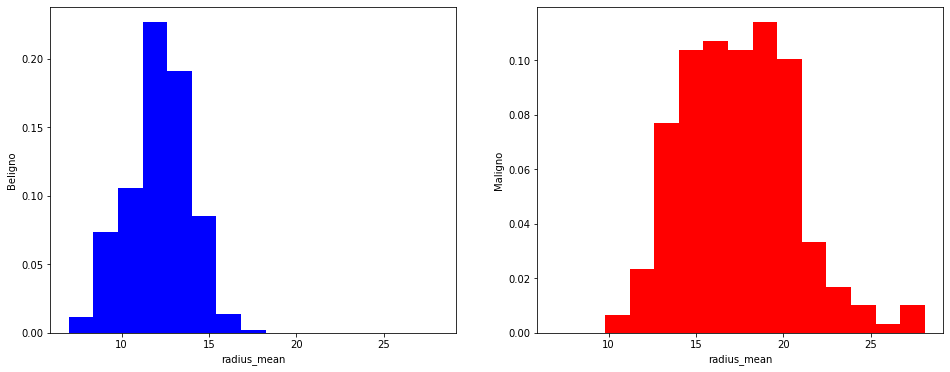

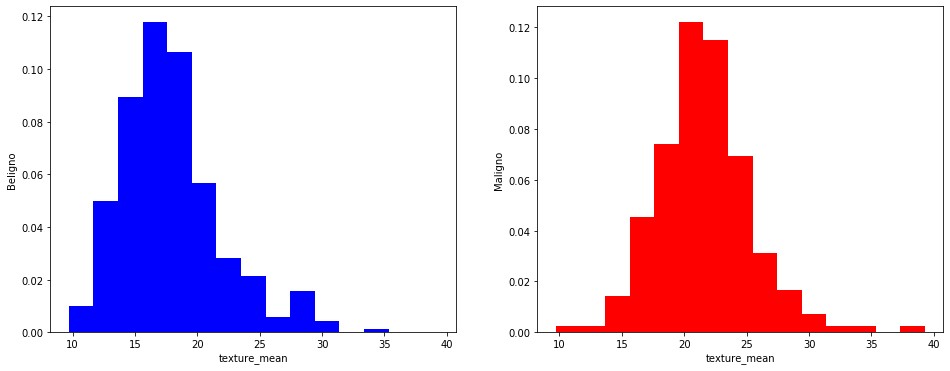

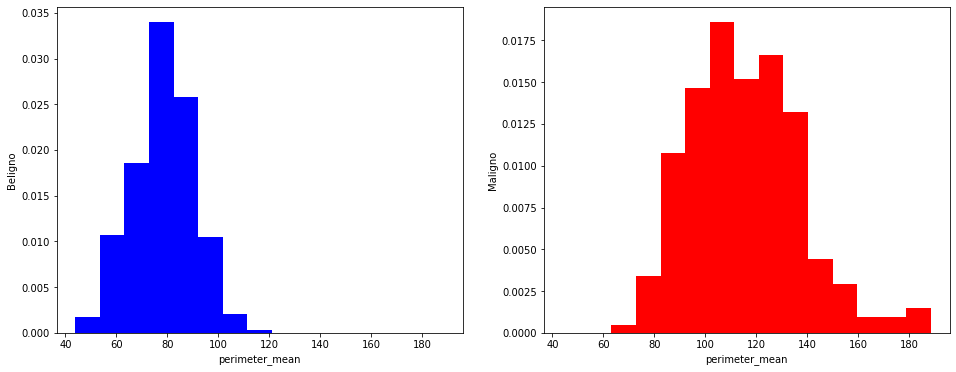

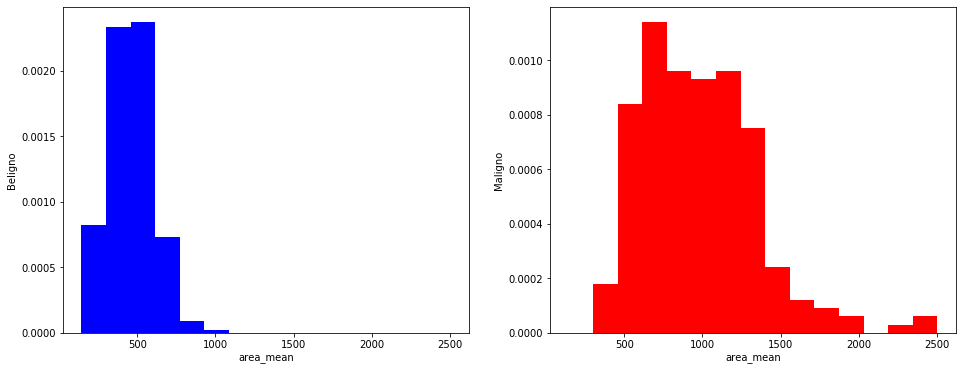

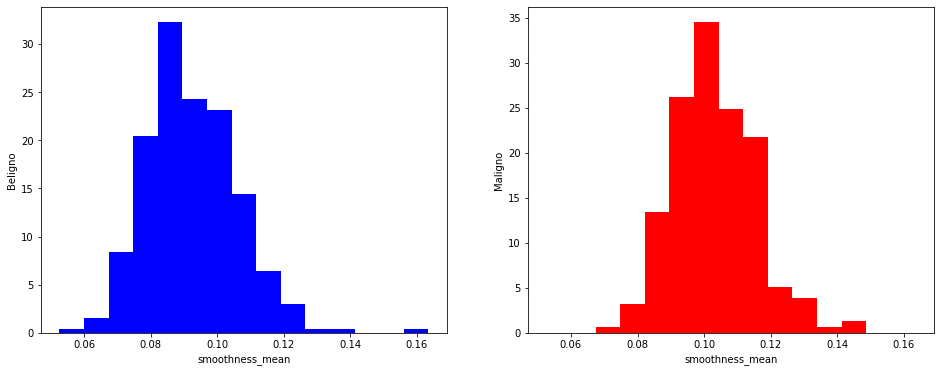

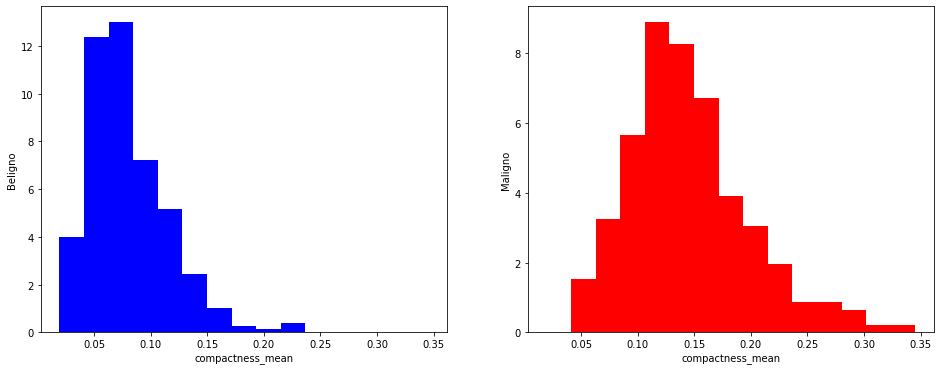

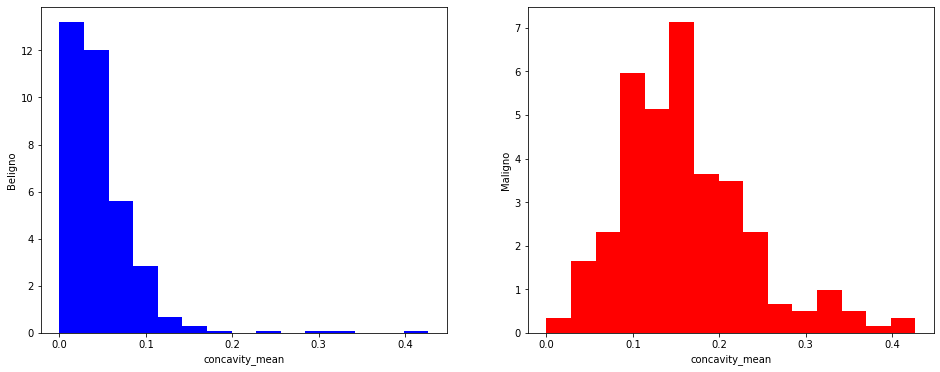

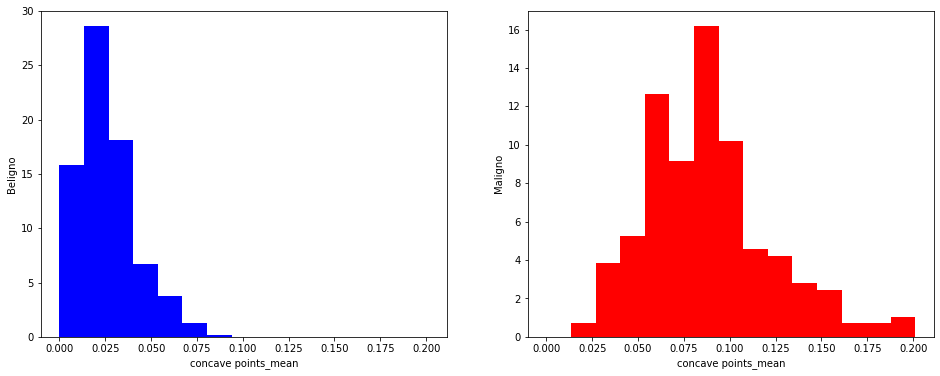

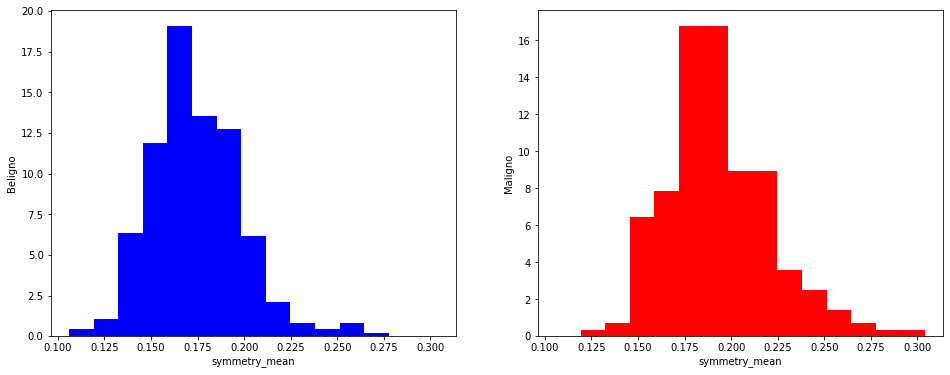

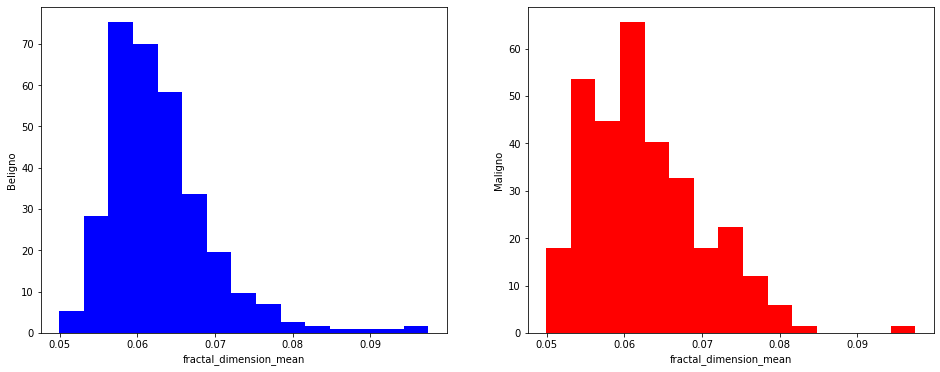

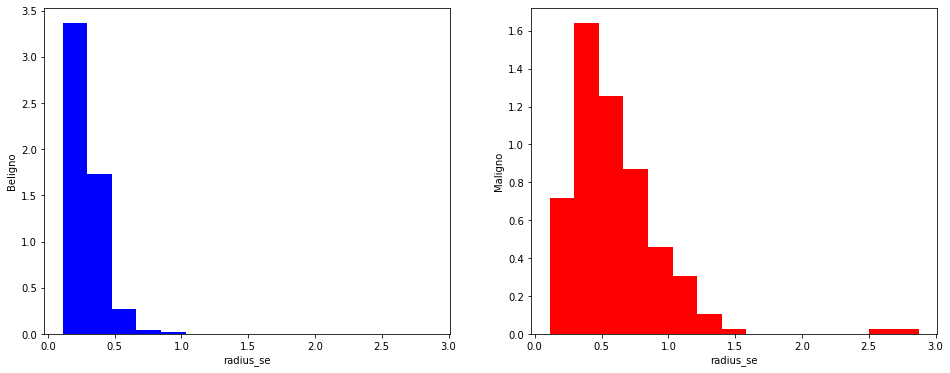

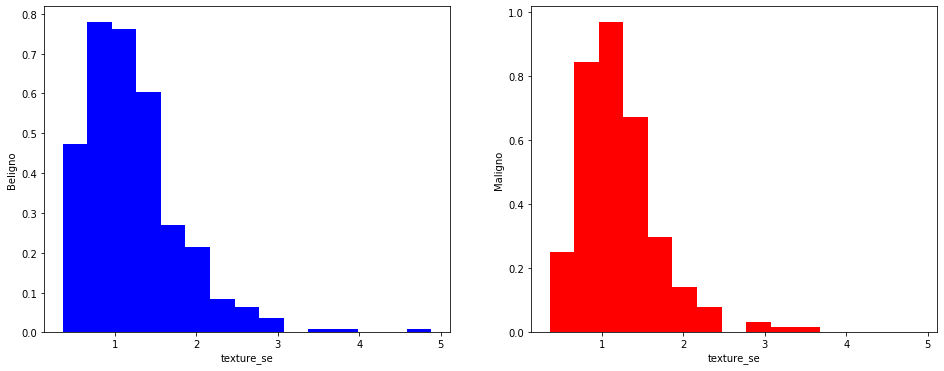

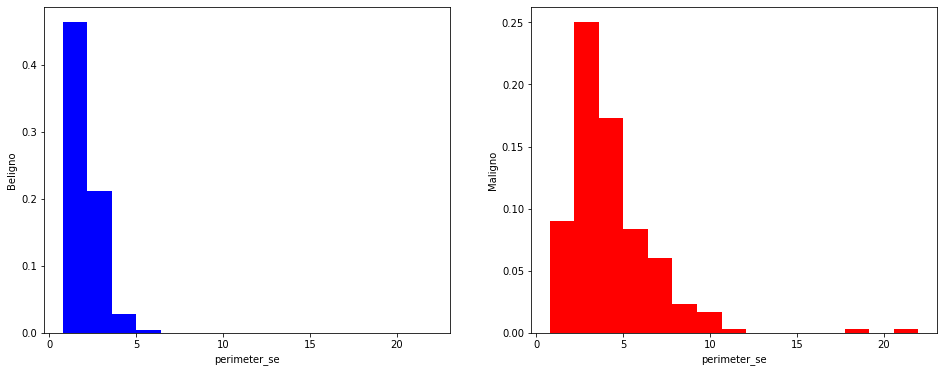

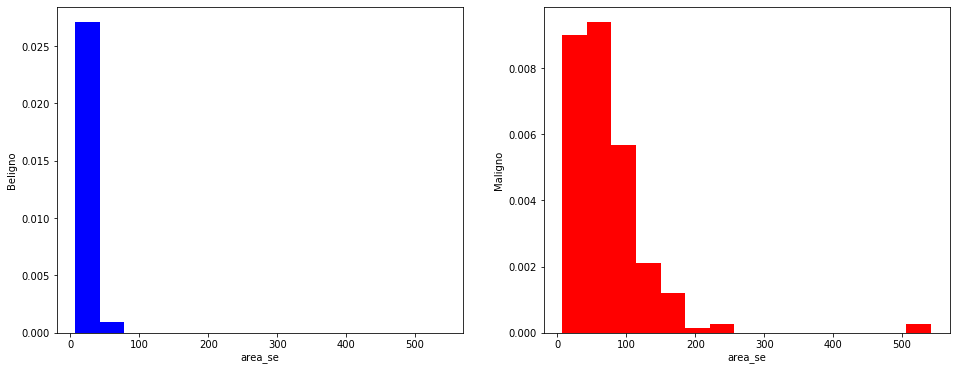

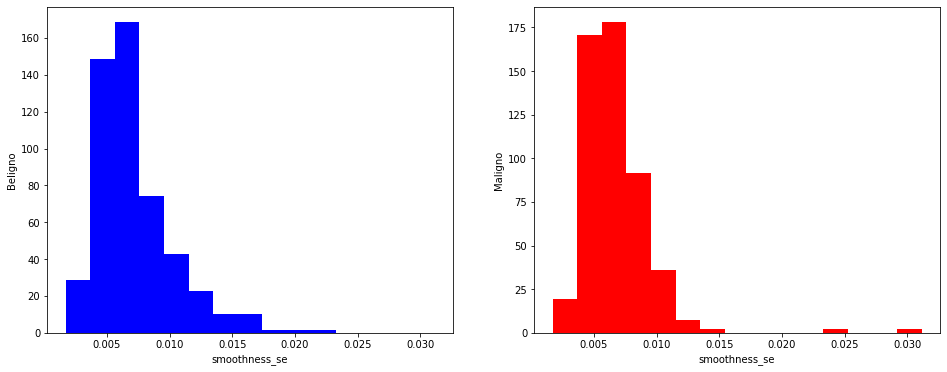

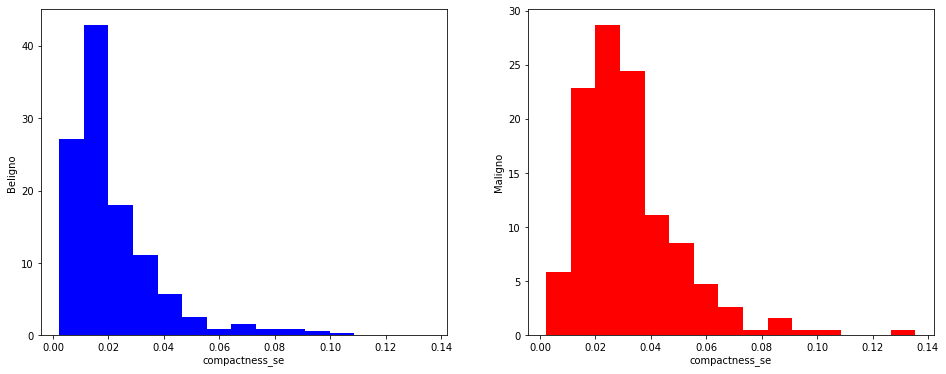

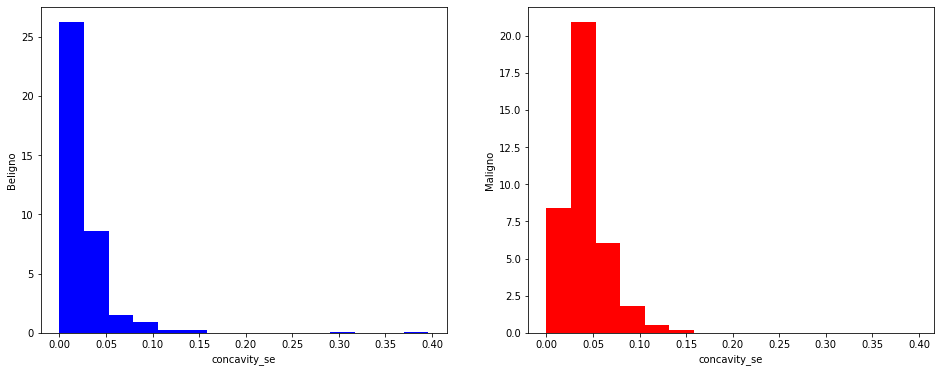

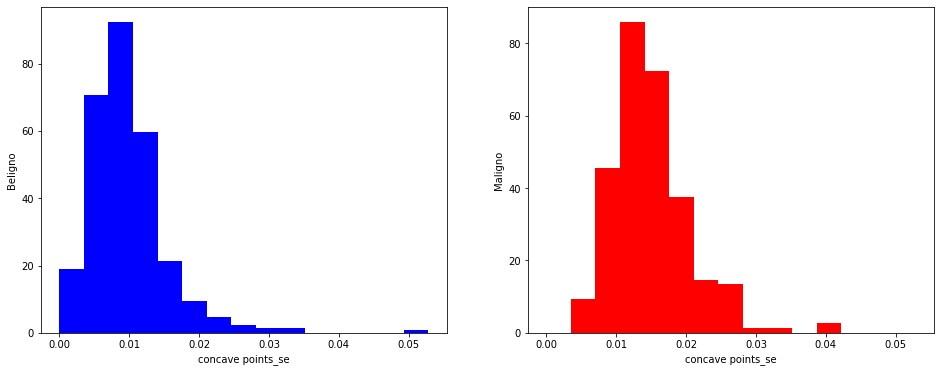

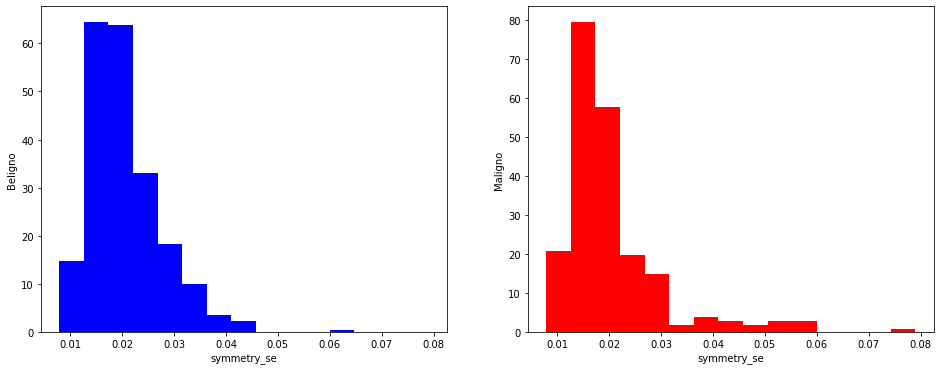

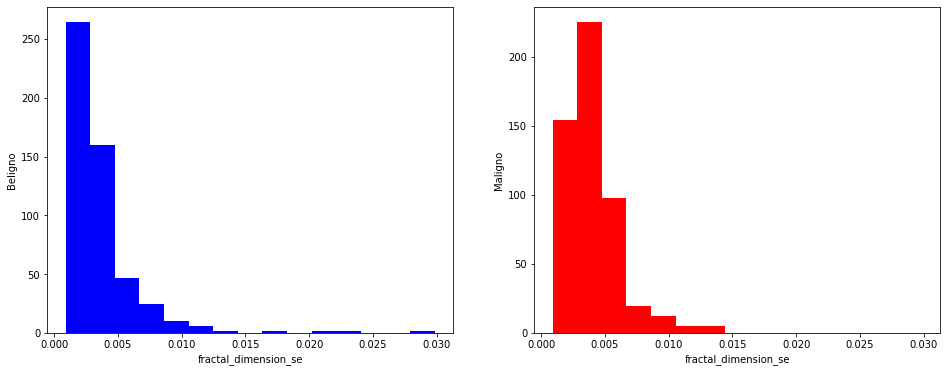

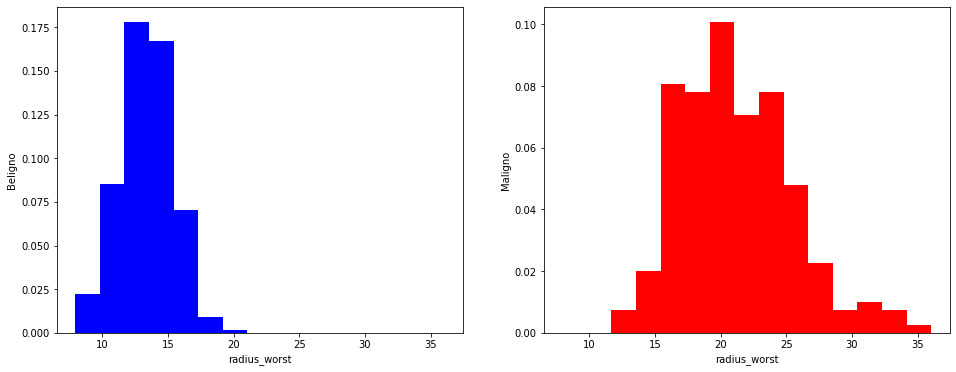

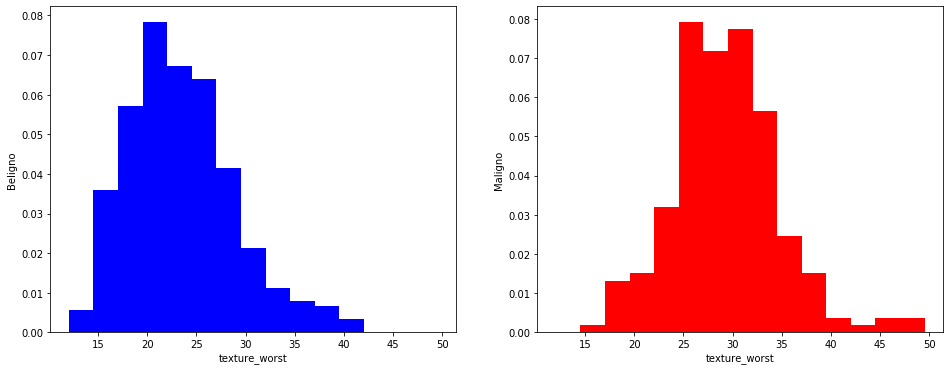

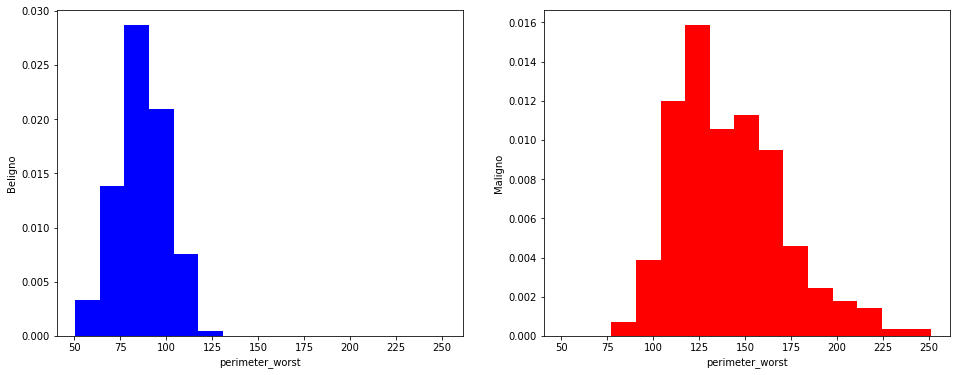

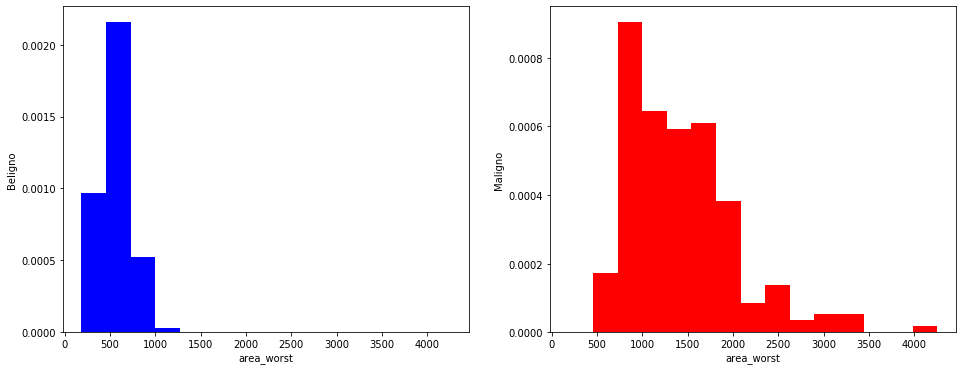

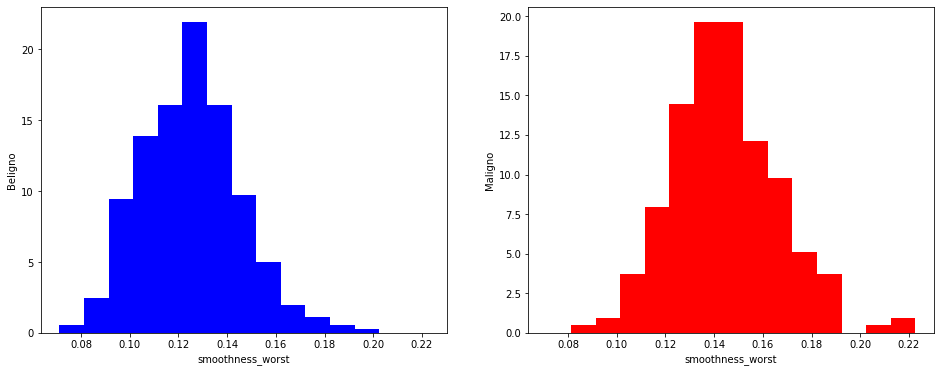

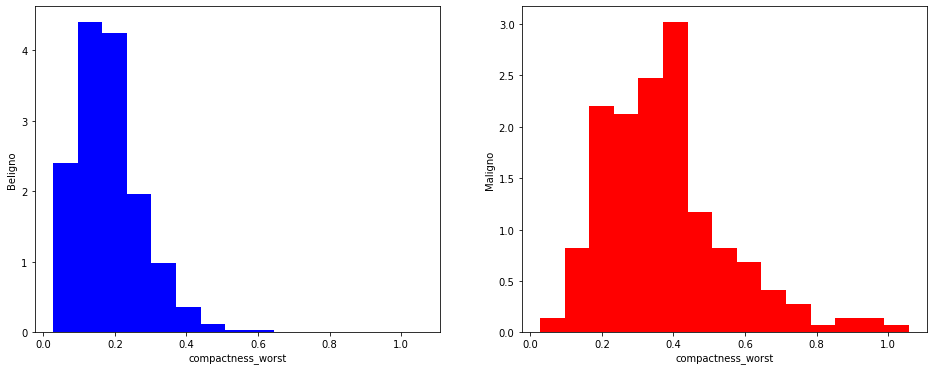

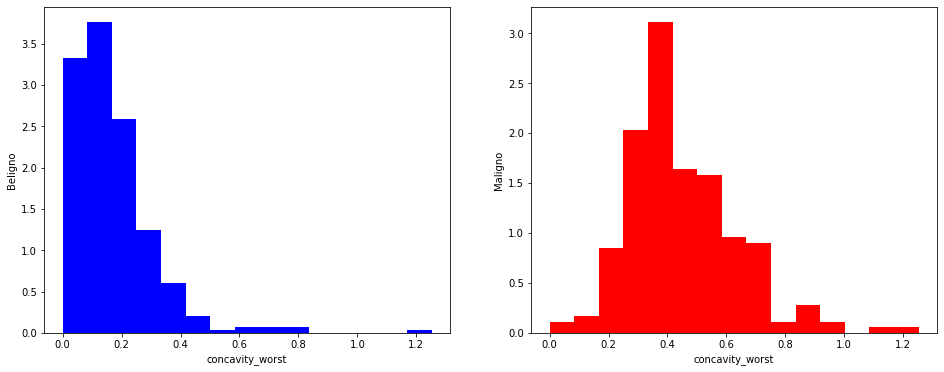

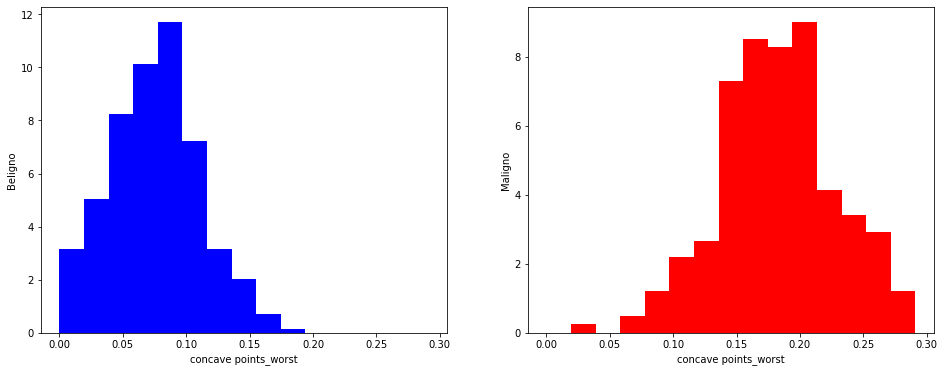

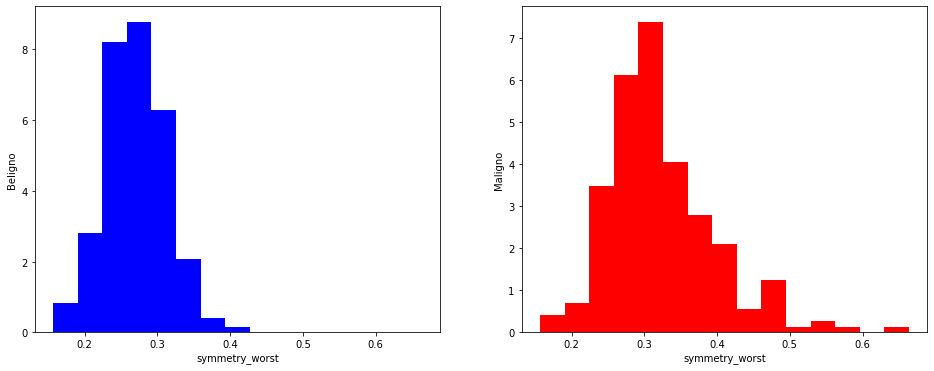

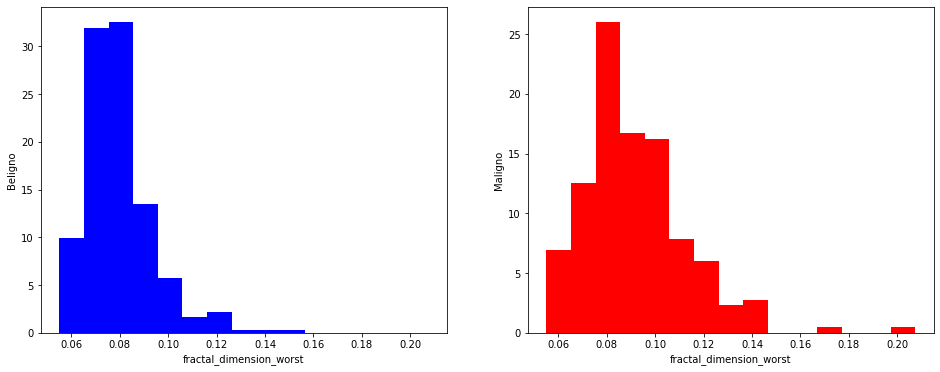

In [116]:
varquanti=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


for var in varquanti:
    
    minimo = dados[var].min()
    maximo = dados[var].max()
    faixas = np.linspace(minimo, maximo, 16)
    bins = faixas   

    plt.figure(figsize=(16,6))

    plt.subplot(121)
    plt.hist(dados[dados.diagnosis==1][var], bins = faixas, color = 'b',density=True)
    plt.xlabel(var)
    plt.ylabel('Beligno')

    plt.subplot(122)
    plt.hist(dados[dados.diagnosis==0][var], bins = faixas, color = 'r',density=True)
    plt.xlabel(var)
    plt.ylabel('Maligno')





6.981